In [503]:
# Importing all the essential Libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

#Importing the plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all the libraries neceesray for EDA and Feature Engineering
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Importing all the Linear Regression Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

%matplotlib inline

In [504]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [505]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [506]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [507]:
train_df.dtypes[train_df.dtypes != "objects"]

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [508]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

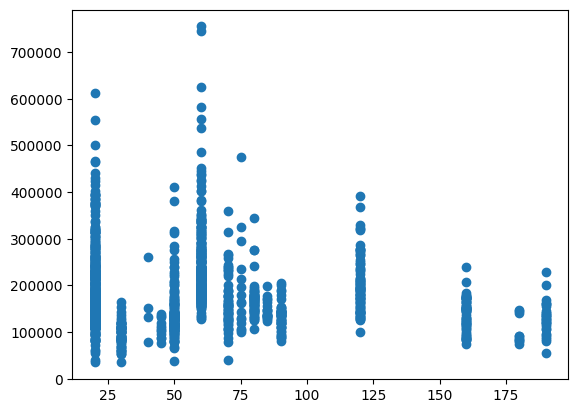

In [509]:
plt.scatter(x = "MSSubClass", y = "SalePrice", data = train_df);

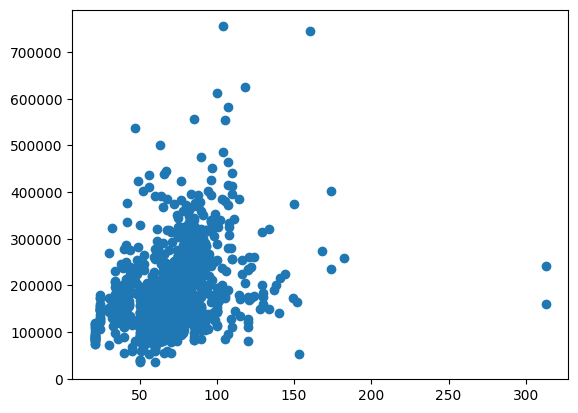

In [510]:
plt.scatter(x = "LotFrontage", y = "SalePrice", data = train_df);

## New way to see the ***outlier rows*** quickly using `.query()`

In [511]:
train_df.query("LotFrontage > 300")
# Drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


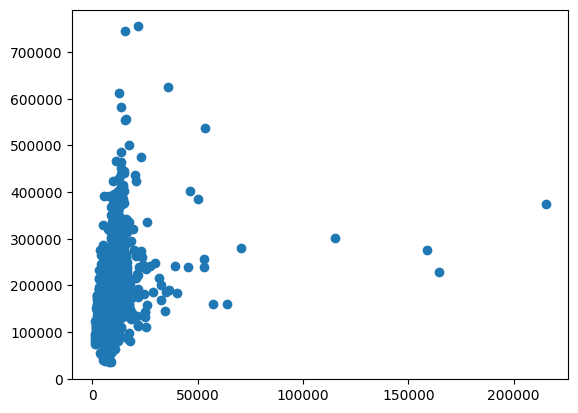

In [512]:
plt.scatter(x = "LotArea", y = "SalePrice", data = train_df);

In [513]:
train_df.query("LotArea > 55000")
# Drop 250 zs(14.881285), 314 zs(20.518273), 336 zs(15.448542), 452 zs(6.037793), 707 zs(10.486449), 1299 zs(5.348867), 1397 zs(4.678682)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


## Method to ***Drop Outliers*** using ***Z-score*** using `.zscore()`

In [514]:
stats.zscore(train_df["LotArea"]).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

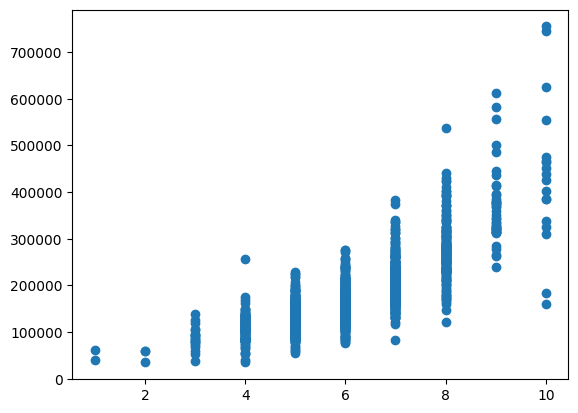

In [515]:
plt.scatter(x = "OverallQual", y = "SalePrice", data = train_df);

In [516]:
train_df.query("OverallQual == 10")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [517]:
train_df.columns[train_df.dtypes != "object"]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

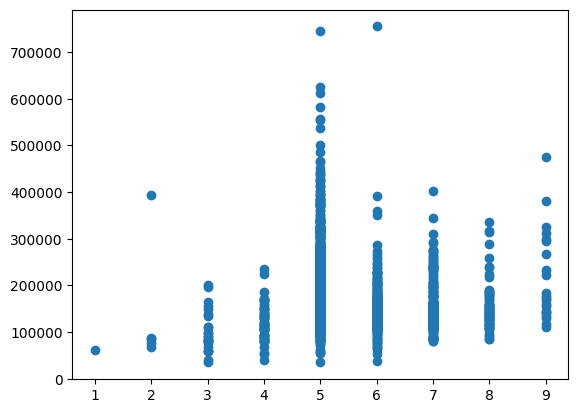

In [518]:
plt.scatter(x = "OverallCond", y = "SalePrice", data = train_df);

In [519]:
train_df.query("OverallCond == 2")
# 379 (Very high sp for OC=2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [520]:
train_df.query("OverallCond == 5 & SalePrice > 700000")
# 1183 (Very high sp for OC=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [521]:
train_df.query("OverallCond == 6 & SalePrice > 700000")
# 692 (Very high sp for OC=6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


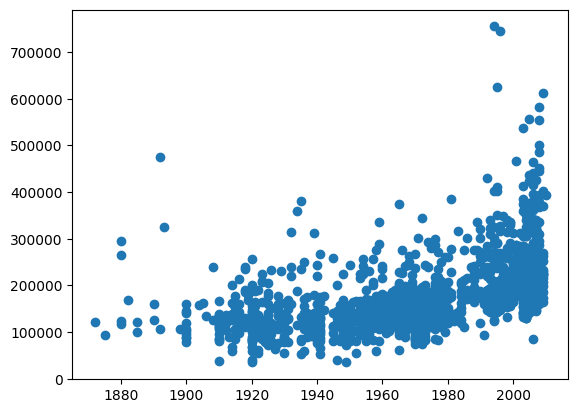

In [522]:
plt.scatter(x = "YearBuilt", y = "SalePrice", data = train_df);

In [523]:
train_df.query("YearBuilt < 1900 & SalePrice > 400000")
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


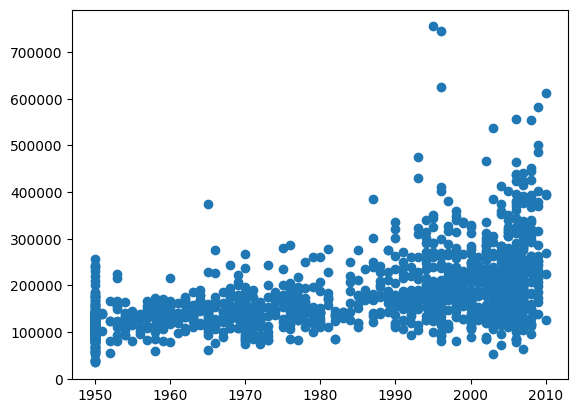

In [524]:
plt.scatter(x = "YearRemodAdd", y = "SalePrice", data = train_df);

In [525]:
train_df.query("YearRemodAdd < 2000 & YearRemodAdd > 1990 & SalePrice > 650000")
# 692, 1183 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [526]:
train_df.query("YearRemodAdd < 1970 & SalePrice > 300000")
#314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [527]:
train_df.columns[train_df.dtypes != "object"]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

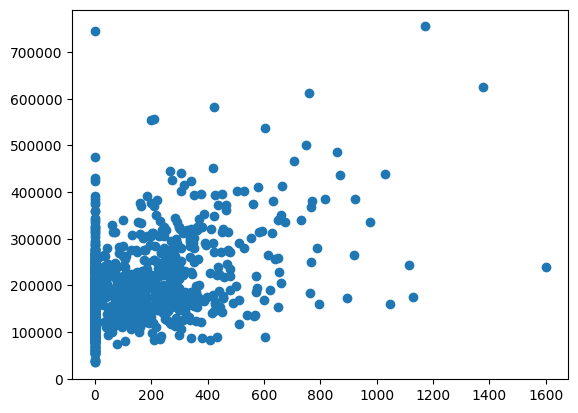

In [528]:
plt.scatter(x = "MasVnrArea", y = "SalePrice", data = train_df);

In [529]:
train_df.query("MasVnrArea > 1400")
# 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


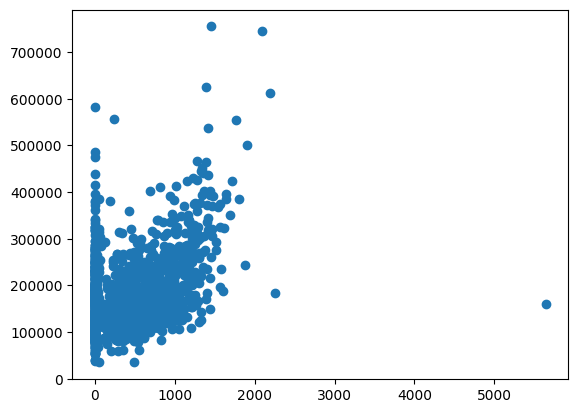

In [530]:
plt.scatter(x = "BsmtFinSF1", y = "SalePrice", data = train_df);

In [531]:
train_df.query("BsmtFinSF1 > 3000")
# 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


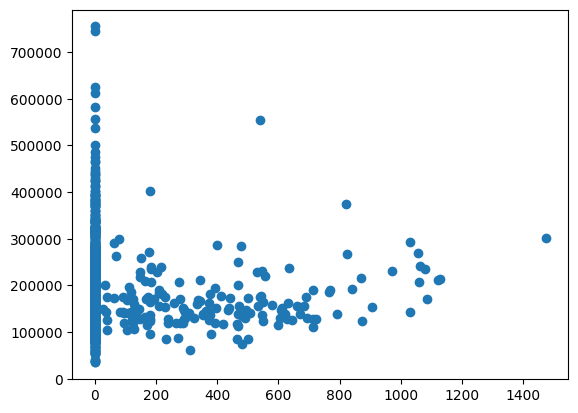

In [532]:
plt.scatter(x = "BsmtFinSF2", y = "SalePrice", data = train_df);

In [533]:
train_df.query("BsmtFinSF2 > 1400")
# 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [534]:
train_df.query("BsmtFinSF2 > 400 & SalePrice > 500000")
# 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


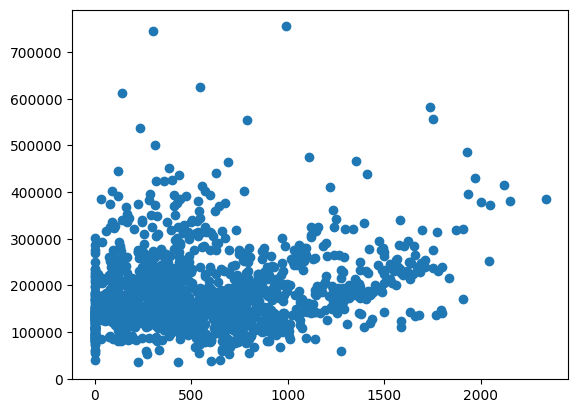

In [535]:
plt.scatter(x = "BsmtUnfSF", y = "SalePrice", data = train_df);

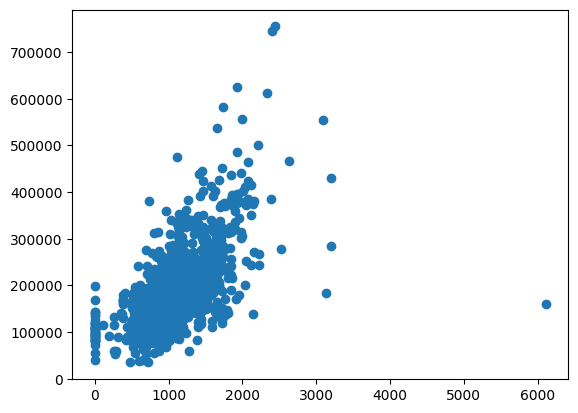

In [536]:
plt.scatter(x = "TotalBsmtSF", y = "SalePrice", data = train_df);

In [537]:
train_df.query("TotalBsmtSF > 5000")
# 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


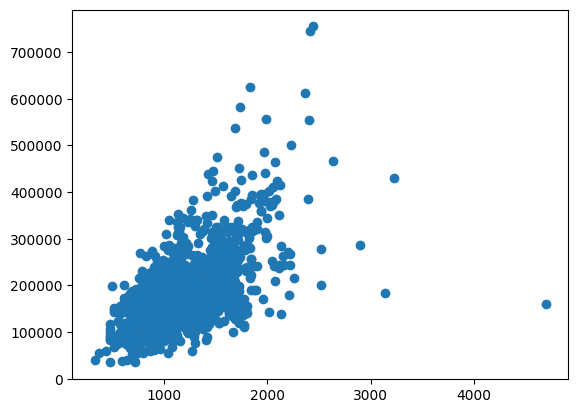

In [538]:
plt.scatter(x = "1stFlrSF", y = "SalePrice", data = train_df);

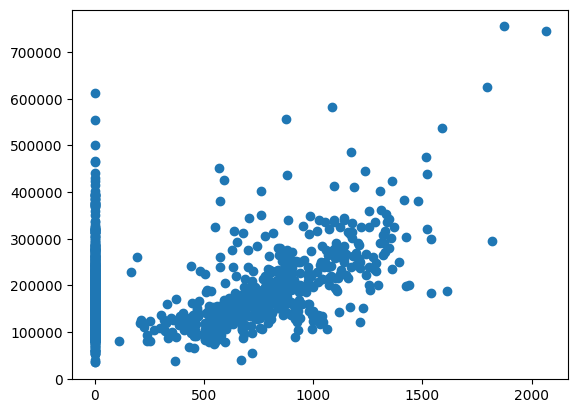

In [539]:
plt.scatter(x = "2ndFlrSF", y = "SalePrice", data = train_df);

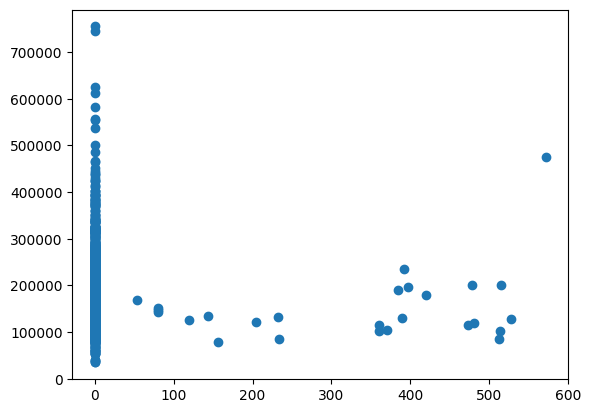

In [540]:
plt.scatter(x = "LowQualFinSF", y = "SalePrice", data = train_df);

In [541]:
train_df.query("LowQualFinSF > 550")
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


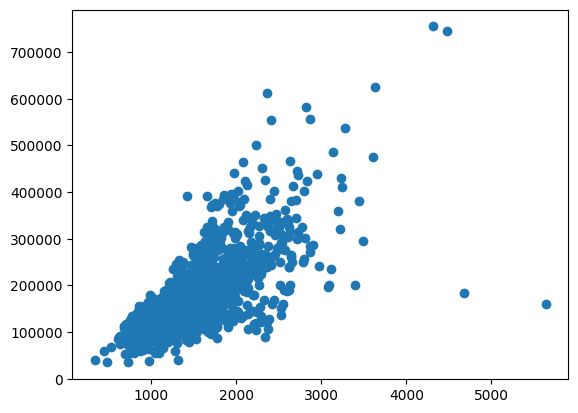

In [542]:
plt.scatter(x = "GrLivArea", y = "SalePrice", data = train_df);

In [543]:
train_df.query("GrLivArea > 4400")
# 1299, 524

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


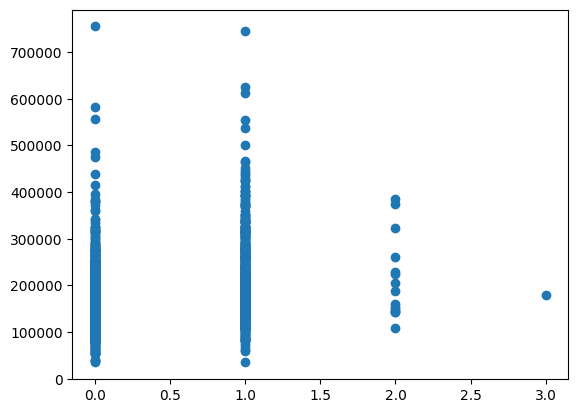

In [544]:
plt.scatter(x = "BsmtFullBath", y = "SalePrice", data = train_df);

In [545]:
train_df.query("BsmtFullBath  == 0 & SalePrice > 700000")
# 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [546]:
train_df.query("BsmtFullBath  == 3")
# 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


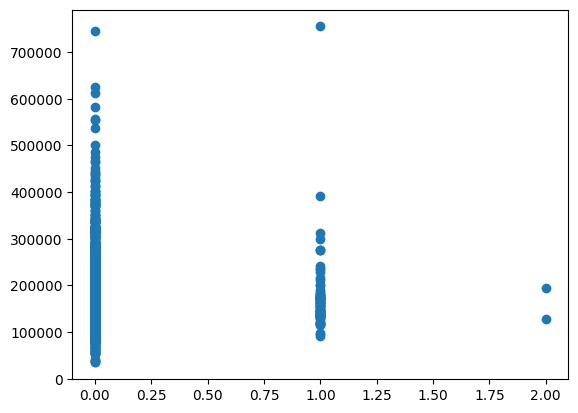

In [547]:
plt.scatter(x = "BsmtHalfBath", y = "SalePrice", data = train_df);

In [548]:
train_df.query("BsmtHalfBath == 1 & SalePrice > 700000")
# 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [549]:
train_df.query("BsmtHalfBath == 2")
# 955, 598

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [550]:
stats.zscore(train_df["BsmtHalfBath"]).sort_values().tail(5)

1006    3.948809
249     3.948809
358     3.948809
597     8.138680
954     8.138680
Name: BsmtHalfBath, dtype: float64

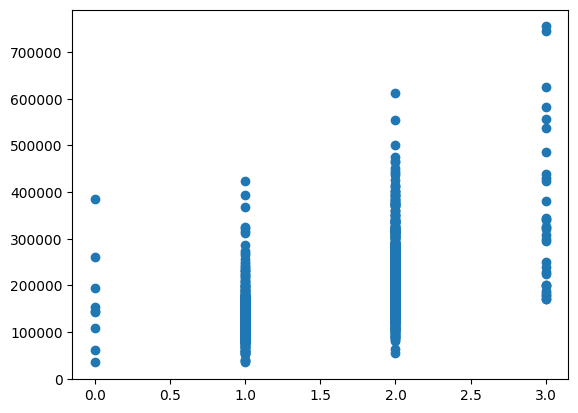

In [551]:
plt.scatter(x = "FullBath", y = "SalePrice", data = train_df);

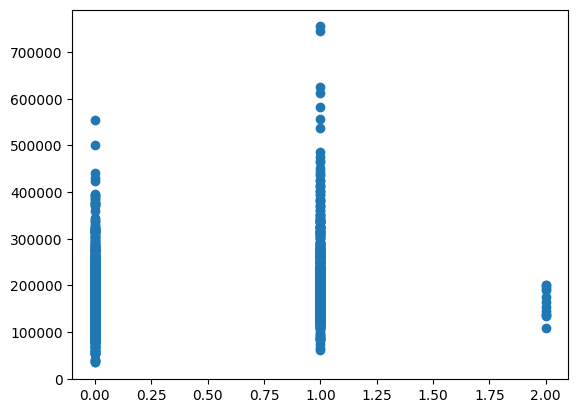

In [552]:
plt.scatter(x = "HalfBath", y = "SalePrice", data = train_df);

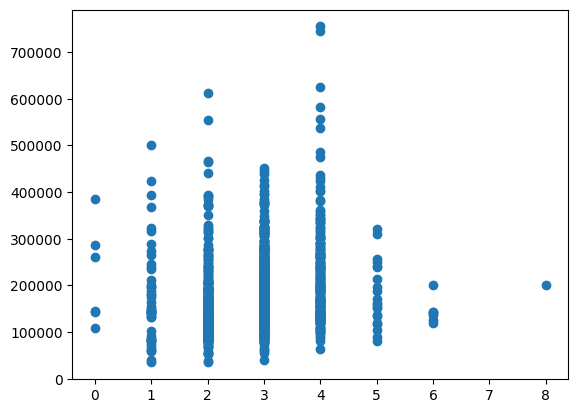

In [553]:
plt.scatter(x = "BedroomAbvGr", y = "SalePrice", data = train_df);

In [554]:
train_df.query("BedroomAbvGr == 8")
# 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


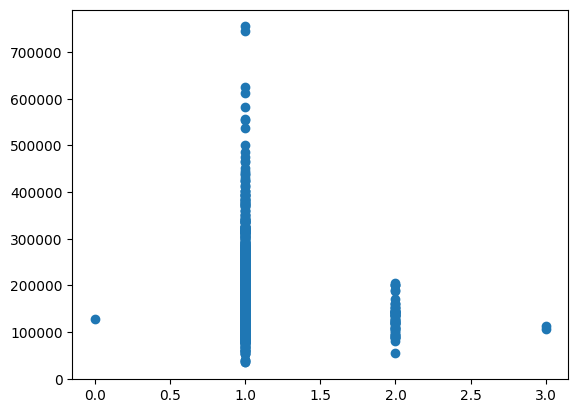

In [555]:
plt.scatter(x = "KitchenAbvGr", y = "SalePrice", data = train_df);

In [556]:
train_df.query("KitchenAbvGr == 3")
# 49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


In [557]:
train_df.query("KitchenAbvGr == 0")
# 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


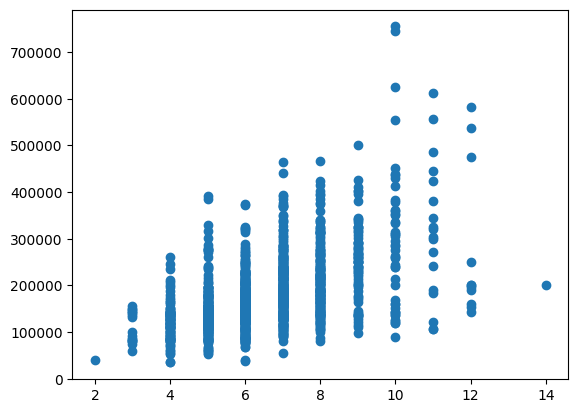

In [558]:
plt.scatter(x = "TotRmsAbvGrd", y = "SalePrice", data = train_df);

In [559]:
train_df.query("TotRmsAbvGrd == 14")
# 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


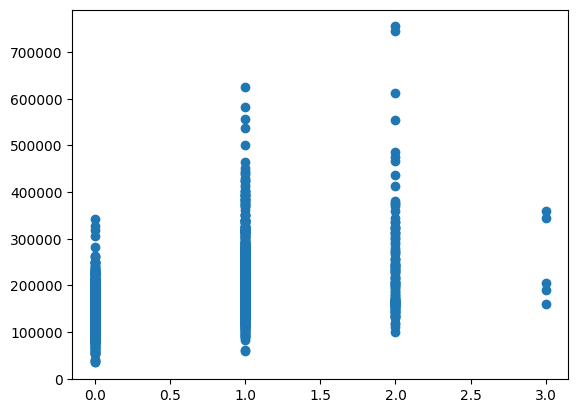

In [560]:
plt.scatter(x = "Fireplaces", y = "SalePrice", data = train_df);

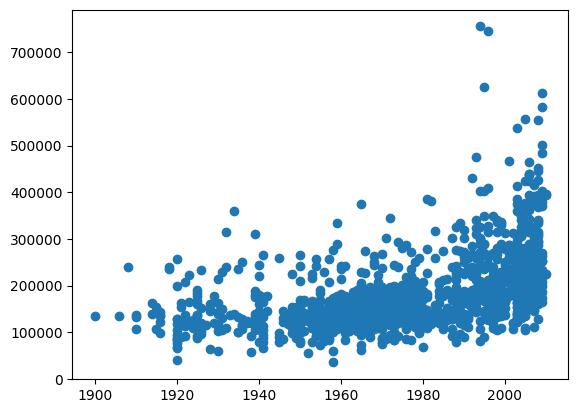

In [561]:
plt.scatter(x = "GarageYrBlt", y = "SalePrice", data = train_df);

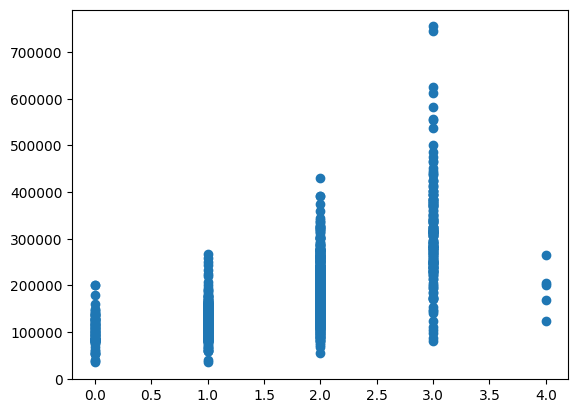

In [562]:
plt.scatter(x = "GarageCars", y = "SalePrice", data = train_df);

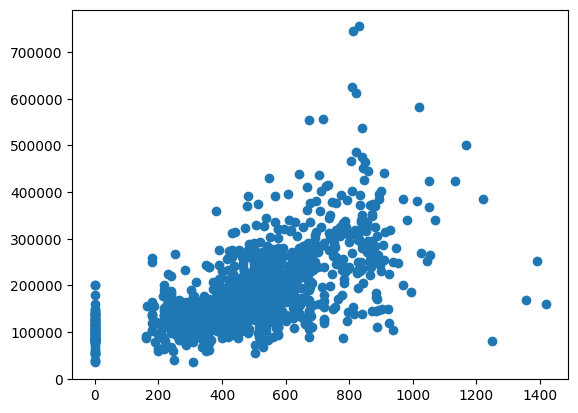

In [563]:
plt.scatter(x = "GarageArea", y = "SalePrice", data = train_df);

In [564]:
train_df.query("GarageArea > 1200")
# 1062, 1191, 1299, 582, 826

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


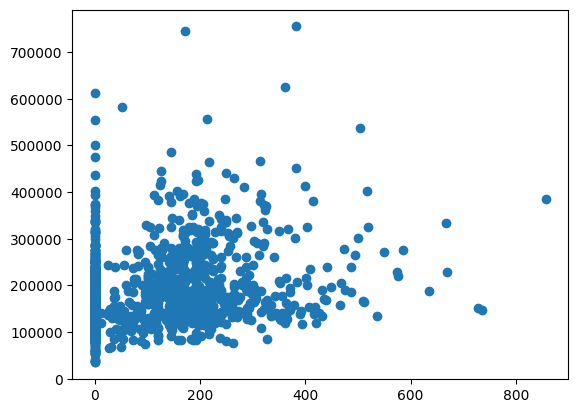

In [565]:
plt.scatter(x = "WoodDeckSF", y = "SalePrice", data = train_df);

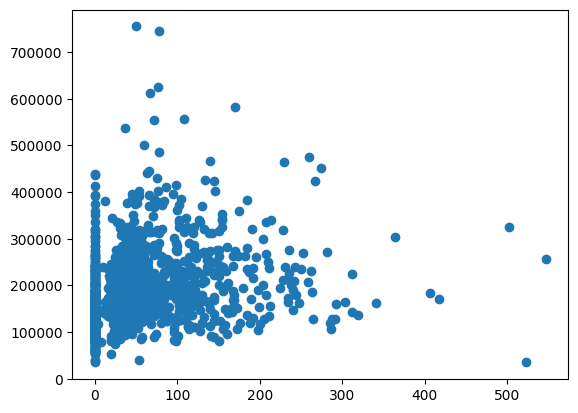

In [566]:
plt.scatter(x = "OpenPorchSF", y = "SalePrice", data = train_df);

In [567]:
train_df.query("OpenPorchSF > 500 & SalePrice < 100000")
# 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900


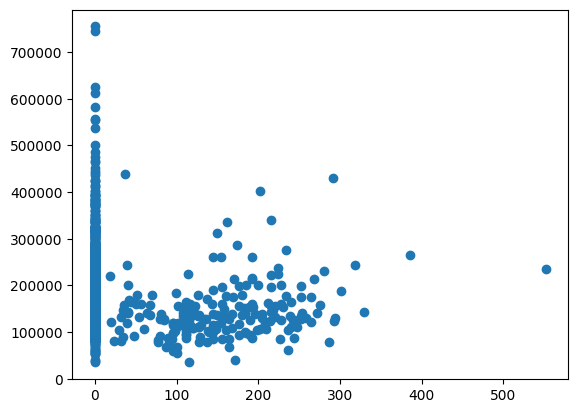

In [568]:
plt.scatter(x = "EnclosedPorch", y = "SalePrice", data = train_df);

In [569]:
train_df.query("EnclosedPorch > 500")
# 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


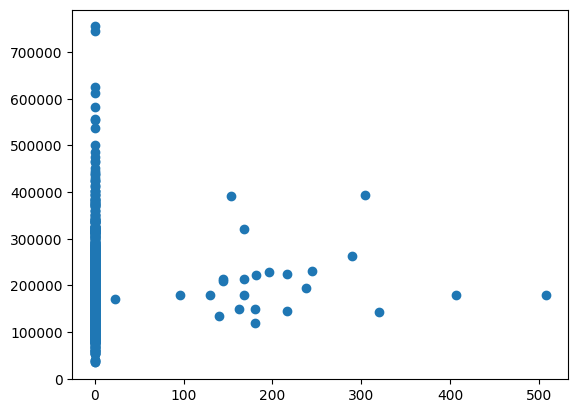

In [570]:
plt.scatter(x = "3SsnPorch", y = "SalePrice", data = train_df);

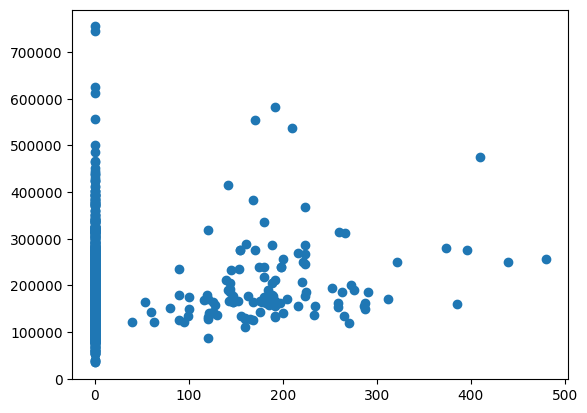

In [571]:
plt.scatter(x = "ScreenPorch", y = "SalePrice", data = train_df);

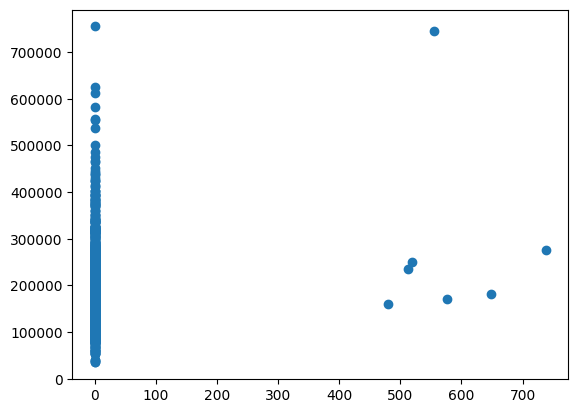

In [572]:
plt.scatter(x = "PoolArea", y = "SalePrice", data = train_df);

In [573]:
train_df.query("PoolArea > 500 & SalePrice > 700000")
# 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


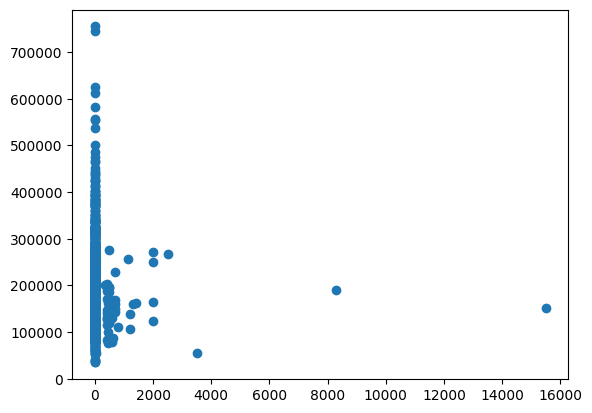

In [574]:
plt.scatter(x = "MiscVal", y = "SalePrice", data = train_df);

In [575]:
train_df.query("MiscVal > 15000")
# 347

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


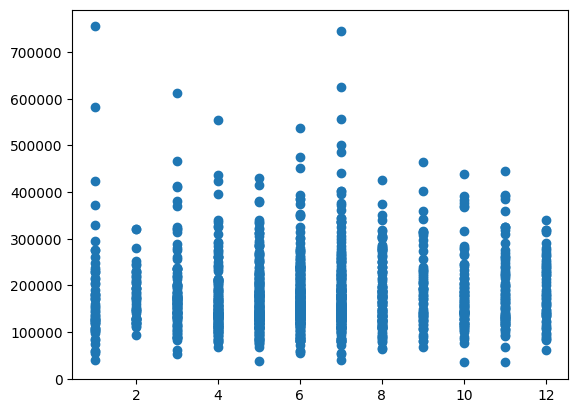

In [576]:
plt.scatter(x = "MoSold", y = "SalePrice", data = train_df);

In [577]:
train_df.query("MoSold < 2 & SalePrice > 700000")
# 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


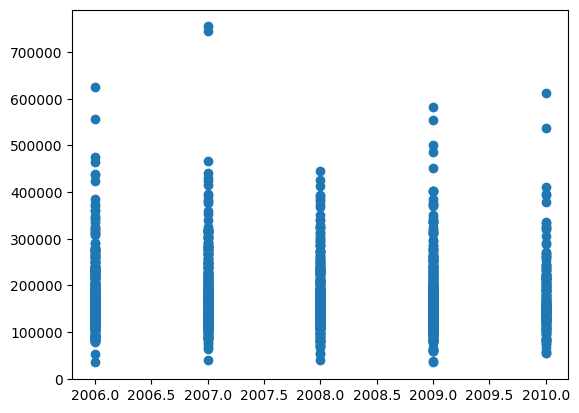

In [578]:
plt.scatter(x = "YrSold", y = "SalePrice", data = train_df);

In [579]:
train_df.query("YrSold == 2007 & SalePrice > 700000")
# 692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [580]:
potential_outlier_rows = list((935, 1299, 250, 314, 336, 452, 707, 1299, 1397, 379, 1183, 692, 186, 314, 298,1299,  323, 441, 1299, 186, 1299, 524, 692, 739, 692, 955, 598, 636,49, 810, 955, 636, 1062, 1191, 1299, 582, 826, 496, 198, 1183, 347, 692, 692, 1183))
unique_outlier_rows = list(set(potential_outlier_rows))
unique_outlier_rows

[524,
 1299,
 1183,
 1062,
 935,
 1191,
 298,
 810,
 49,
 692,
 441,
 186,
 955,
 314,
 826,
 707,
 452,
 323,
 582,
 198,
 336,
 598,
 347,
 739,
 496,
 1397,
 250,
 379,
 636]

### ***Dropping*** all these rows from our ***train_df*** DataFrame using `.Id.isin(unique_outlier_rows) == False`

In [581]:
print(len(train_df))
train_df = train_df[train_df.Id.isin(unique_outlier_rows) == False]

1460


In [582]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(19)

,0
PoolQC,1427
MiscFeature,1381
Alley,1342
Fence,1156
MasVnrType,857
FireplaceQu,682
LotFrontage,253
GarageYrBlt,76
GarageCond,76
GarageType,76


In [583]:
train_df["MiscFeature"].unique()

array([nan, 'Shed', 'Othr', 'Gar2', 'TenC'], dtype=object)

In [584]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [585]:
train_df["Alley"].fillna("No", inplace = True)
test_df["Alley"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\3175310327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Alley"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\3175310327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

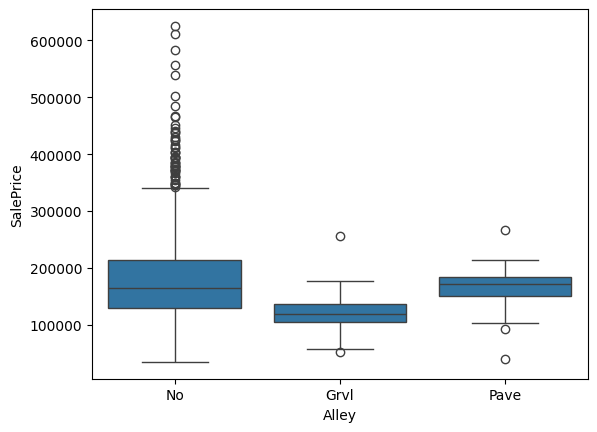

In [586]:
sns.boxplot(data = train_df, x = "Alley", y = "SalePrice");

In [587]:
train_df["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [588]:
train_df["Fence"].fillna("No", inplace = True)
test_df["Fence"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2913115977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Fence"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2913115977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

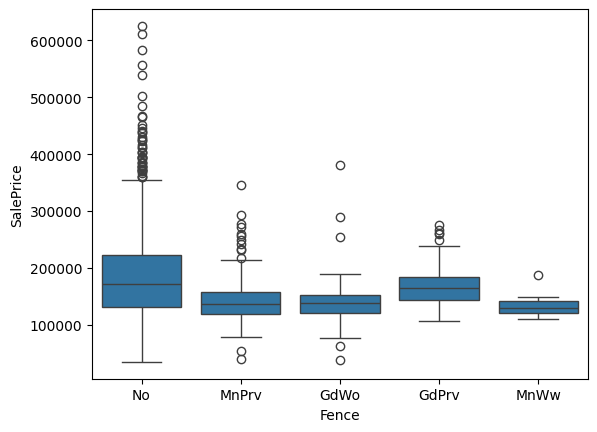

In [589]:
sns.boxplot(data = train_df, x = "Fence", y = "SalePrice");

In [590]:
train_df["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [591]:
train_df["MasVnrType"].fillna("No", inplace = True)
test_df["MasVnrType"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\732196043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrType"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\732196043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

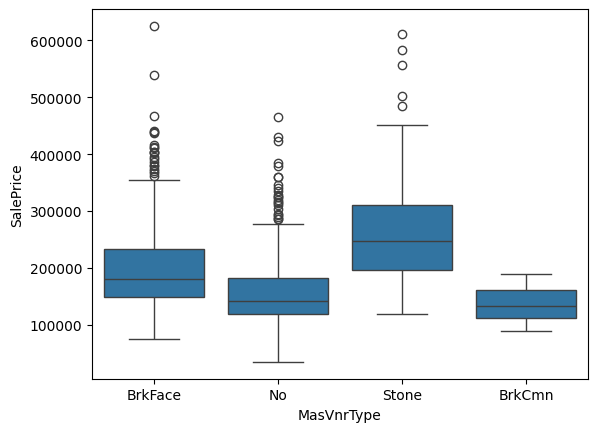

In [592]:
sns.boxplot(data = train_df, x = "MasVnrType", y = "SalePrice");

In [593]:
train_df["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [594]:
train_df["MasVnrArea"].fillna(0, inplace = True)
test_df["MasVnrArea"].fillna(0, inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2424126221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrArea"].fillna(0, inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2424126221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [595]:
train_df["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [596]:
train_df["FireplaceQu"].fillna("No", inplace = True)
test_df["FireplaceQu"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\1340152302.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["FireplaceQu"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\1340152302.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

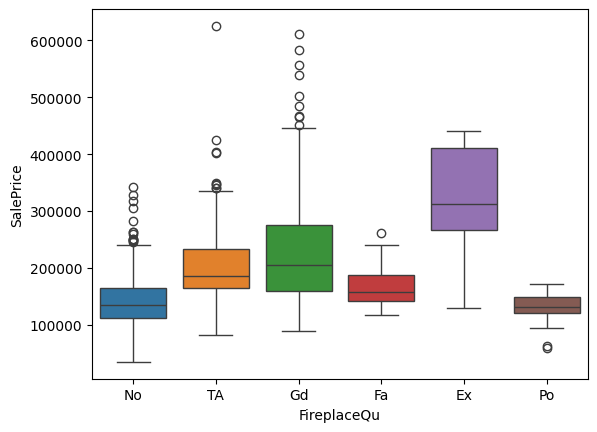

In [597]:
sns.boxplot(data = train_df, x = "FireplaceQu", y = "SalePrice", hue = "FireplaceQu");

In [598]:
train_df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,  83.,
        43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38., 109.,
       130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 128., 149.,
       114., 168., 182., 138., 152., 124., 153.,  46.])

In [599]:
train_df["LotFrontage"].fillna(0, inplace = True)
test_df["LotFrontage"].fillna(0, inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2918143039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["LotFrontage"].fillna(0, inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2918143039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [600]:
train_df["GarageYrBlt"].corr(train_df["YearBuilt"])

0.8276333171033368

In [601]:
train_df["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [602]:
train_df["GarageCond"].fillna("No", inplace = True)
test_df["GarageCond"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2742881767.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageCond"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2742881767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

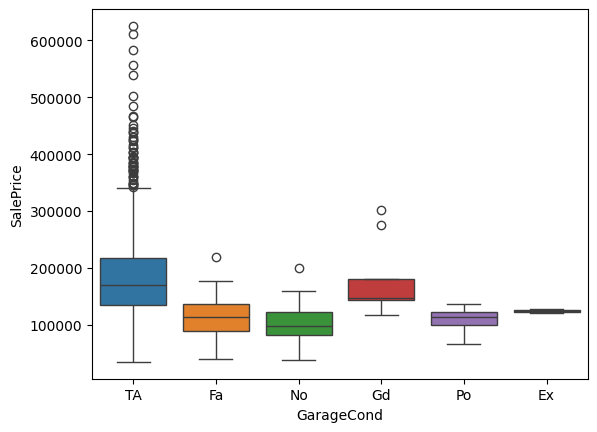

In [603]:
sns.boxplot(data = train_df, x = "GarageCond", y = "SalePrice", hue = "GarageCond");

In [604]:
train_df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [605]:
train_df["GarageType"].fillna("No", inplace = True)
test_df["GarageType"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\1489300527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageType"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\1489300527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

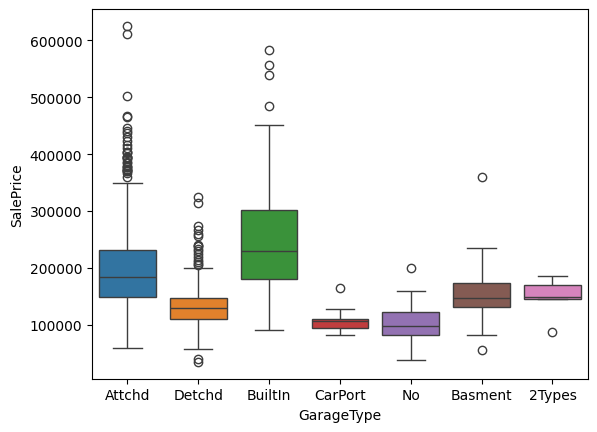

In [606]:
sns.boxplot(data = train_df, x = "GarageType", y = "SalePrice", hue = "GarageType");

In [607]:
train_df["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [608]:
train_df["GarageFinish"].fillna("No", inplace = True)
test_df["GarageFinish"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\129604372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageFinish"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\129604372.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

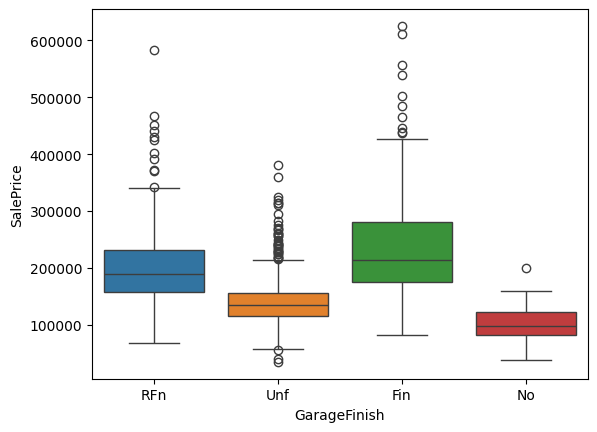

In [609]:
sns.boxplot(data = train_df, x = "GarageFinish", y = "SalePrice", hue = "GarageFinish");

In [610]:
train_df["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [611]:
train_df["GarageQual"].fillna("No", inplace = True)
test_df["GarageQual"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2640775616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["GarageQual"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2640775616.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

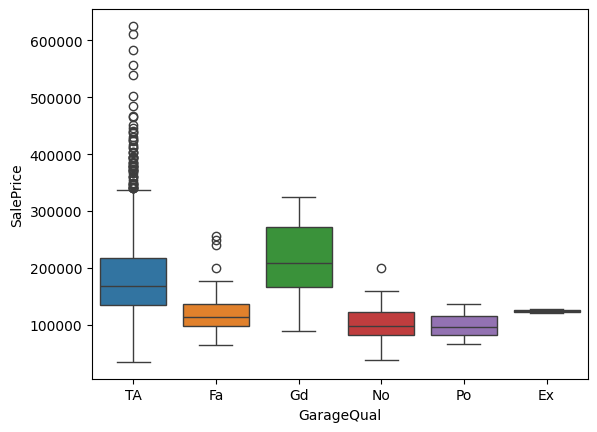

In [612]:
sns.boxplot(data = train_df, x = "GarageQual", y = "SalePrice", hue = "GarageQual");

In [613]:
train_df["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [614]:
train_df["BsmtFinType2"].fillna("Unf", inplace = True)
test_df["BsmtFinType2"].fillna("Unf", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2434644277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtFinType2"].fillna("Unf", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2434644277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

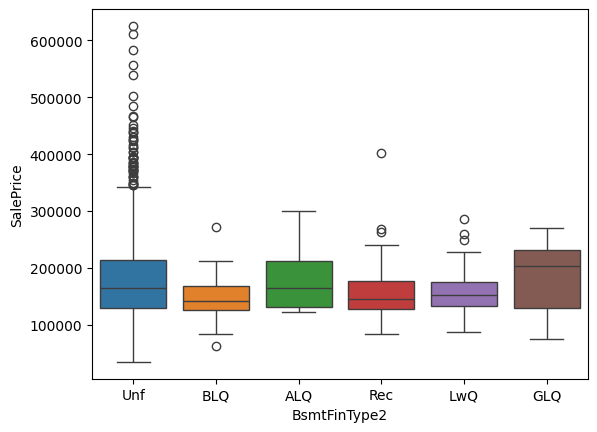

In [615]:
sns.boxplot(data = train_df, x = "BsmtFinType2", y = "SalePrice", hue = "BsmtFinType2");

In [616]:
train_df["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [617]:
train_df["BsmtExposure"].fillna("No", inplace = True)
test_df["BsmtExposure"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2708759980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtExposure"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2708759980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

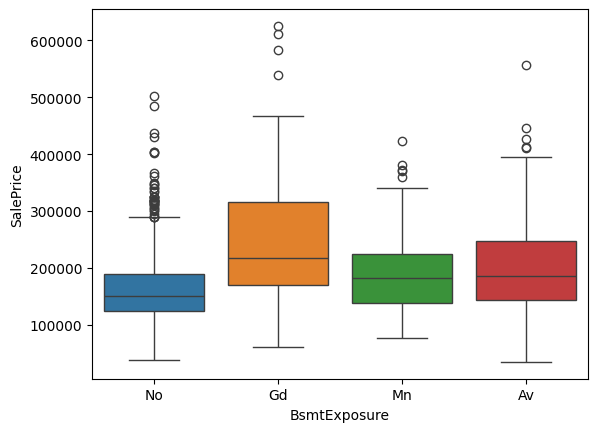

In [618]:
sns.boxplot(data = train_df, x = "BsmtExposure", y = "SalePrice", hue = "BsmtExposure");

In [619]:
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [620]:
train_df["BsmtQual"].fillna("No", inplace = True)
test_df["BsmtQual"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\881477751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtQual"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\881477751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

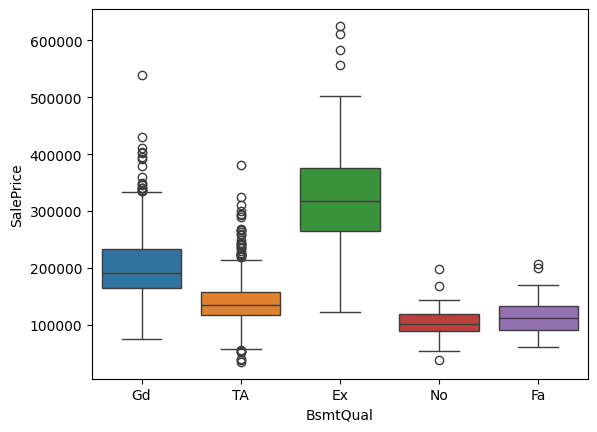

In [621]:
sns.boxplot(data = train_df, x = "BsmtQual", y = "SalePrice", hue = "BsmtQual");

In [622]:
train_df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [623]:
train_df["BsmtCond"].fillna("No", inplace = True)
test_df["BsmtCond"].fillna("No", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\805174569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtCond"].fillna("No", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\805174569.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

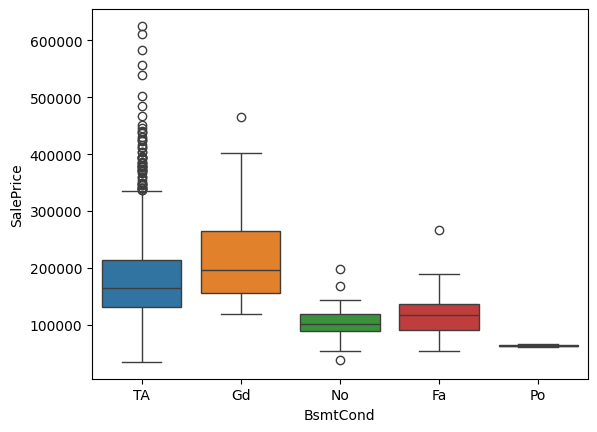

In [624]:
sns.boxplot(data = train_df, x = "BsmtCond", y = "SalePrice", hue = "BsmtCond");

In [625]:
train_df["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [626]:
train_df["BsmtFinType1"].fillna("Unf", inplace = True)
test_df["BsmtFinType1"].fillna("Unf", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2821144306.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["BsmtFinType1"].fillna("Unf", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2821144306.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

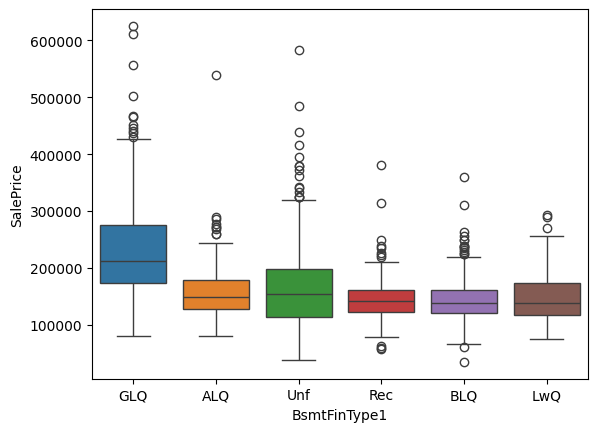

In [627]:
sns.boxplot(data = train_df, x = "BsmtFinType1", y = "SalePrice", hue = "BsmtFinType1");

In [628]:
train_df["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [629]:
train_df["MasVnrArea"].fillna(0, inplace = True)
test_df["MasVnrArea"].fillna(0, inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2424126221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["MasVnrArea"].fillna(0, inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2424126221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [630]:
train_df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [631]:
train_df["Electrical"].fillna("SBrkr", inplace = True)
test_df["Electrical"].fillna("SBrkr", inplace = True)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2077454100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Electrical"].fillna("SBrkr", inplace = True)
C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2077454100.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

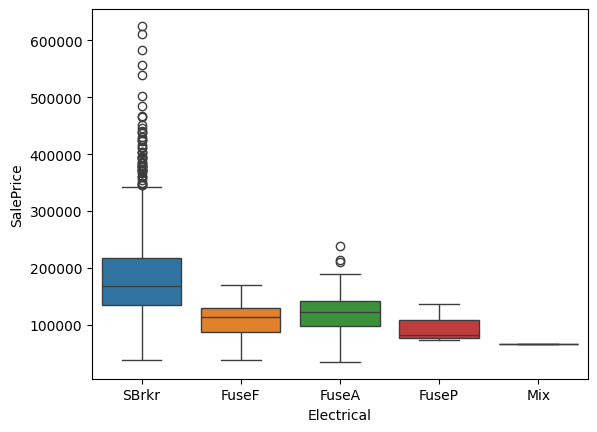

In [632]:
sns.boxplot(data = train_df, x = "Electrical", y = "SalePrice", hue = "Electrical");

In [633]:
train_df = train_df.drop(columns = ["PoolQC", "MiscFeature", "Alley", "Fence", "GarageYrBlt", "GarageCond", "BsmtFinType2"])
test_df = test_df.drop(columns = ["PoolQC", "MiscFeature", "Alley", "Fence", "GarageYrBlt", "GarageCond", "BsmtFinType2"])

## **Feature Engineering**

In [634]:
train_df["houseage"] = train_df["YrSold"] - train_df["YearBuilt"]
test_df["houseage"] = test_df["YrSold"] - test_df["YearBuilt"]

In [635]:
train_df["houseremodelage"] = train_df["YrSold"] - train_df["YearRemodAdd"]
test_df["houseremodelage"] = test_df["YrSold"] - test_df["YearRemodAdd"]

In [636]:
train_df["totalsf"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"] + train_df["BsmtFinSF1"] + train_df["BsmtFinSF2"]
test_df["totalsf"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"]

In [637]:
train_df["totalarea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
test_df["totalarea"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

In [638]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath'])

In [639]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [640]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

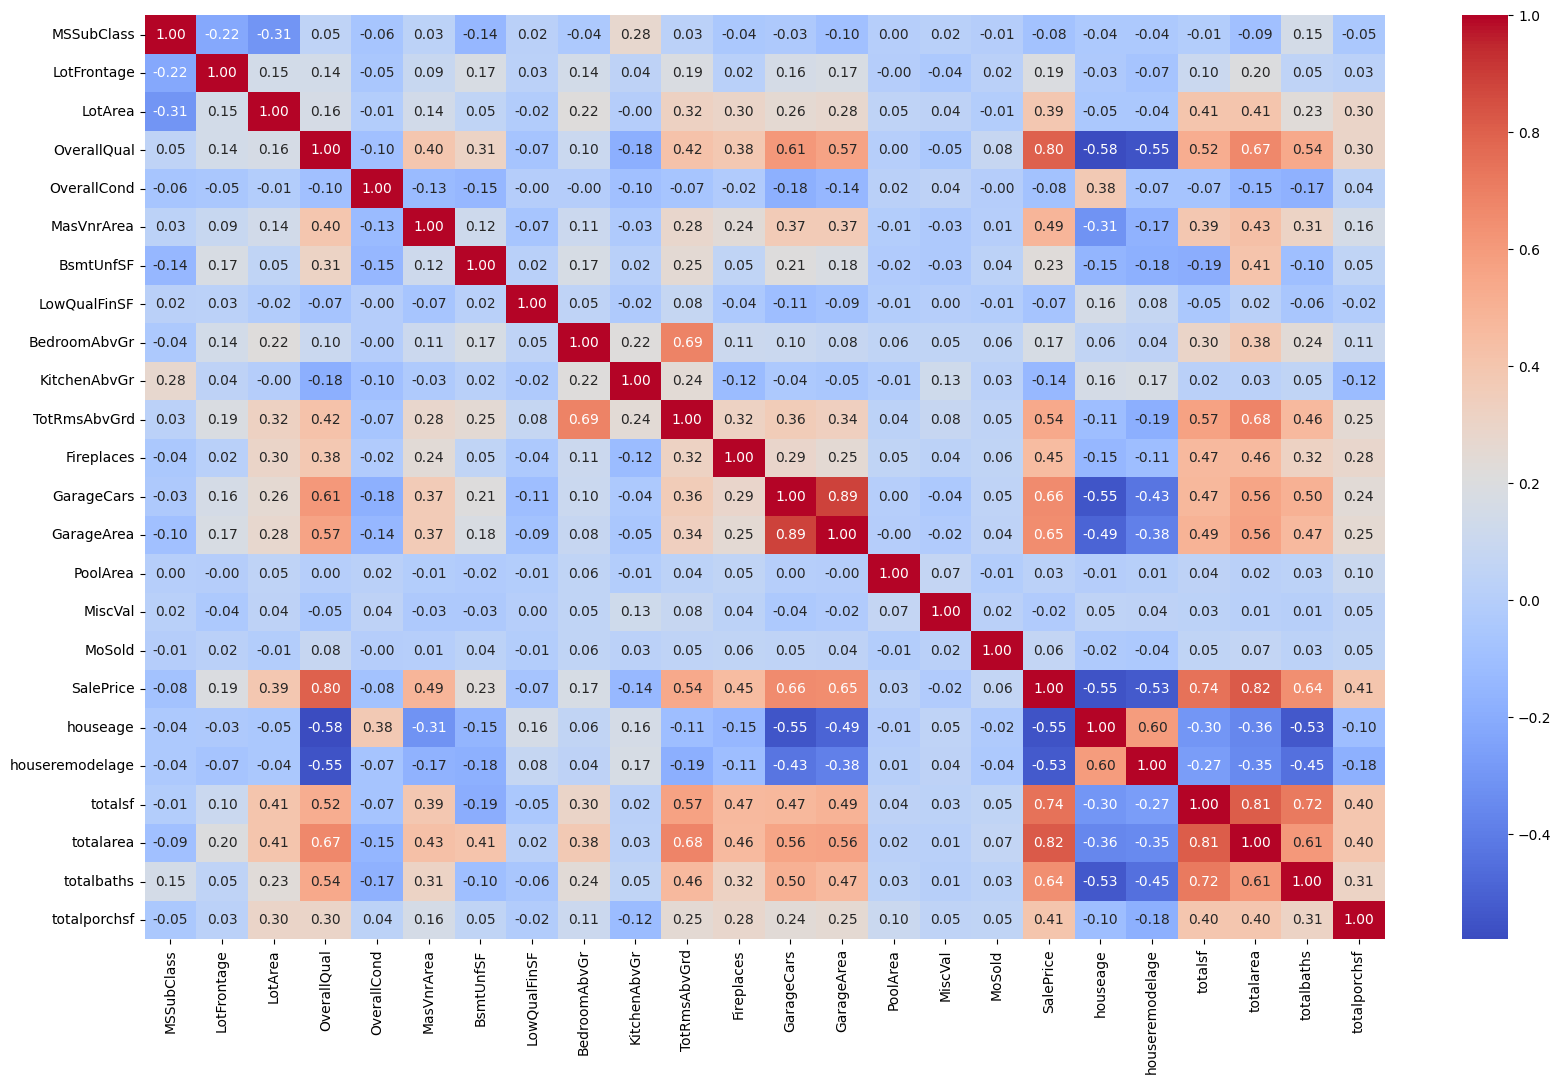

In [641]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");

## ***High*** **Correlation** Columns
- `GarageCars` and `GarageArea`

In [642]:
train_df = train_df.drop(columns = ["GarageArea"])
test_df = test_df.drop(columns = ["GarageArea"])

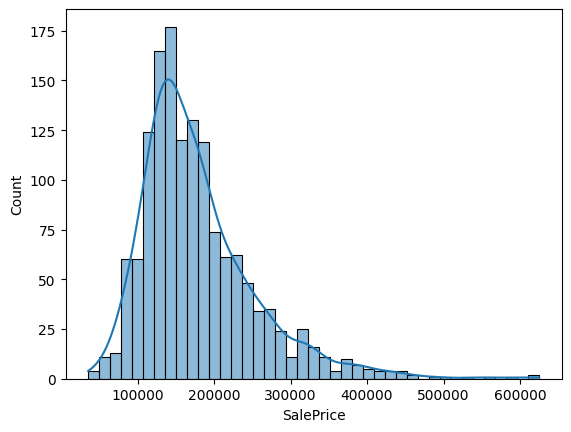

In [643]:
sns.histplot(
    train_df,
    x=train_df['SalePrice'],
    kde=True
);

In [644]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

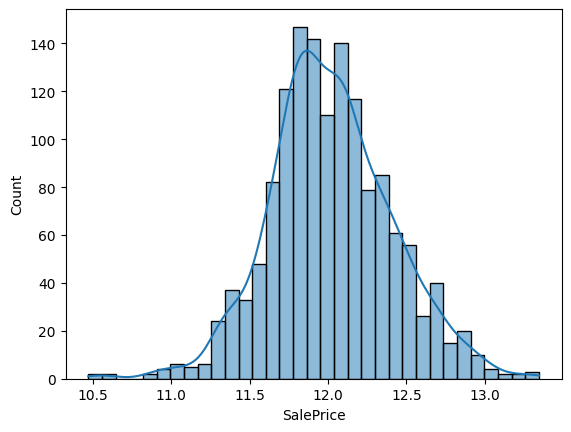

In [645]:
sns.histplot(
    train_df,
    x=train_df['SalePrice'],
    kde=True
);

In [646]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [647]:
train_df.dtypes[train_df.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

## ***Ordinal Encoding*** is a type of encoding in which **ORDER Matters**
Example LandSlope:
LandSlope: Slope of property
		
       Gtl ------->Gentle slope
       Mod ------->Moderate Slope	
       Sev ------->Severe Slope

In [648]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [649]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [650]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [651]:
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [652]:
ode_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

In [653]:
ohe_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output= False))
])

In [654]:
col_trans = ColumnTransformer(transformers=[
    ("num_p", num_pipeline, num_cols),
    ("ode_p", ode_pipeline, ode_cols),
    ("ohe_p", ohe_pipeline, ohe_cols)
], remainder="passthrough", n_jobs=-1)

In [655]:
pipeline = Pipeline(steps=[
    ("preprocessing", col_trans)
])

In [656]:
X = train_df.drop("SalePrice", axis = 1)
Y = train_df["SalePrice"]

In [657]:
X_preprocessed = pipeline.fit_transform(X)
X_preprocessed

array([[ 0.07905713,  0.2433906 , -0.29247913, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87462677,  0.69970813, -0.06025518, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07905713,  0.33465411,  0.27293572, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.3174781 ,  0.27381177, -0.17293428, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87462677,  0.33465411, -0.03662891, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87462677,  0.54760229,  0.00779654, ...,  0.        ,
         0.        ,  0.        ]])

In [658]:
X_train, X_test, Y_train, Y_test = train_test_split(X_preprocessed,Y, test_size=0.2, random_state=25)

## ***Model*** Building

In [659]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
mean_squared_error(Y_test, Y_pred_lr)

508727959974328.2

In [660]:
RFR = RandomForestRegressor(random_state=13)
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, Y_train)
np.sqrt(-1 * rfr_cv.best_score_)

0.1300180587338261

In [661]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [662]:
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_cv.fit(X_train, Y_train)
np.sqrt(-1 * xgb_cv.best_score_)

C:\Users\Akshat Shethia\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.1148378119906995

In [663]:
ridge = Ridge()
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, Y_train)
np.sqrt(-1 * ridge_cv.best_score_)

0.1102365513465722

In [665]:
GBR = GradientBoostingRegressor()
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
GBR_cv.fit(X_train, Y_train)
np.sqrt(-1 * GBR_cv.best_score_)

C:\Users\Akshat Shethia\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.11159502265799168

In [666]:
lgbm_regressor = lgb.LGBMRegressor()
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, Y_train)
np.sqrt(-1 * lgbm_cv.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data points in the train set: 1144, number of used features: 114
[LightGBM] [Info] Start training from score 12.020712


0.12484720556526856

In [668]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
cat_cv.fit(X_train, Y_train)
np.sqrt(-1 * cat_cv.best_score_)

0.11191173684851799

In [669]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])
vr.fit(X_train, Y_train)
Y_pred_vr = vr.predict(X_test)
mean_squared_error(Y_test, Y_pred_vr, squared=False)

C:\Users\Akshat Shethia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.12246897300640647

In [670]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [671]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)
stackreg.fit(X_train, Y_train)
Y_pred_stack = stackreg.predict(X_test)
mean_squared_error(Y_test, Y_pred_stack, squared=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000880 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data points in the train set: 1144, number of used features: 114
[LightGBM] [Info] Start training from score 12.020712
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1878
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 106
[LightGBM] [Info] Start training from score 12.020015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 108
[LightGBM] [Info] Start tra

C:\Users\Akshat Shethia\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.1290226715543299

In [672]:
df_test_preprocess = pipeline.transform(test_df)

In [673]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission_stack.csv', index=False)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2159888559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking


In [674]:
y_ridge = np.exp(ridge_cv.predict(df_test_preprocess))

df_y_ridge_out = test_df[['Id']]
df_y_ridge_out['SalePrice'] = y_ridge

df_y_ridge_out.to_csv('submission_ridge.csv', index=False)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\3510596030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_ridge_out['SalePrice'] = y_ridge


In [675]:
y_cat_cv = np.exp(cat_cv.predict(df_test_preprocess))

df_y_cat_cv_out = test_df[['Id']]
df_y_cat_cv_out['SalePrice'] = y_cat_cv

df_y_cat_cv_out.to_csv('submission_cat_cv.csv', index=False)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\2208960053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_cat_cv_out['SalePrice'] = y_cat_cv


In [676]:
y_xgb_cv = np.exp(xgb_cv.predict(df_test_preprocess))

df_y_xgb_cv_out = test_df[['Id']]
df_y_xgb_cv_out['SalePrice'] = y_xgb_cv

df_y_xgb_cv_out.to_csv('submission_xgb_cv.csv', index=False)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\3404768592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_xgb_cv_out['SalePrice'] = y_xgb_cv


In [677]:
y_GBR_cv = np.exp(GBR_cv.predict(df_test_preprocess))

df_y_GBR_cv_out = test_df[['Id']]
df_y_GBR_cv_out['SalePrice'] = y_GBR_cv

df_y_GBR_cv_out.to_csv('submission_GBR_cv.csv', index=False)

C:\Users\Akshat Shethia\AppData\Local\Temp\ipykernel_15744\133067742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_GBR_cv_out['SalePrice'] = y_GBR_cv


In [679]:
mean_squared_error(Y_test, Y_pred_stack)

0.01664684977501649